# Лабораторна робота №1. Побудова еліпсів Петуніна

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline
np.random.seed(0)

## 1. Набір точок

### 1.1. Випадкова генерація точок

Функція:

In [2]:
def get_random_points(limits, n_points):
    x_min, x_max, y_min, y_max = limits
    xs = np.random.uniform(x_min, x_max, n_points)
    ys = np.random.uniform(y_min, y_max, n_points)
    return xs + 1j * ys

Використання:

In [3]:
limits = (-10, 10, -5, 5)
points = get_random_points(limits, 100)

### 1.2. Запис точок у файл

Функція:

In [4]:
def write_points(points, filename):
    with open(filename, 'w') as file:
        file.write(str(points.shape[0]) + '\n')
        for point in points:
            file.write(f"{point.real} {point.imag}\n")

Використання:

In [5]:
write_points(points, 'random_100.txt')

### 1.3. Зчитування точок з файлу

Функція:

In [6]:
def read_points(filename):
    """ input format:
    n_points
    x_1 y_1
    x_2 y_2
    ... ...
    x_n y_n
    """
    with open(filename, 'r') as file:
        n_points = int(file.readline())
        points = []
        for i in range(n_points):
            xi, yi = map(float, file.readline().split())
            points.append(xi + 1j * yi)
        return np.array(points)

Використання:

In [7]:
assert((points == read_points('random_100.txt')).all())

## 2. Пошук найвіддаленішої пари точок

### 2.1. Наївний квадратичний алгоритм

Функція:

In [8]:
def find_furthest_points(points):
    max_distance = 0
    indices = 0, 0
    for first_index, first_point in enumerate(points):
        for second_index, second_point in enumerate(points[:first_index]):
            distance = np.abs(first_point - second_point)
            if max_distance < distance:
                max_distance = distance
                indices = first_index, second_index
    return sorted(indices, key=lambda index: points[index].real)

Використання:

In [9]:
indices = find_furthest_points(points)

## 3. Поворот точок

### 3.1. Пошук кута повороту

Функція:

In [10]:
def get_rotation_angle(points, indices):
    return np.angle(points[indices[1]] - points[indices[0]])

Використання:

In [11]:
rotation_angle = get_rotation_angle(points, indices)

### 3.2. Власне поворот

Функція:

In [12]:
def rotate_points(points, rotation_center, rotation_angle):
    return (points - rotation_center) * np.exp(1j * rotation_angle)

Використання:

In [13]:
rotated_points = rotate_points(points, np.mean(points[indices]), -rotation_angle)

### 4. Пошук перпендикулярів

### 4.1. Пошук екстремальних точок

Функція:

In [14]:
def get_vertical_extremes(points):
    return [np.argmin(points.imag), np.argmax(points.imag)]

Використання:

In [15]:
vertical_indices = get_vertical_extremes(rotated_points)

### 4.2. Подубова самих перпендикулярів

Функція:

In [16]:
def get_vertical_perpendiculars(points, vertical_indices):
    first_segment = np.array([points[vertical_indices[0]], points[vertical_indices[0]].real])
    second_segment = np.array([points[vertical_indices[1]], points[vertical_indices[1]].real])
    return np.array([first_segment, second_segment])

Використання:

In [17]:
vertical_perpendiculars = get_vertical_perpendiculars(rotated_points, vertical_indices)

## 5. Стиск точок

### 5.1. Пошук коефіцієнту стиску

Функція

In [18]:
def get_compression_ratio(rotated_points, indices, vertical_indices):
    x_extent = np.abs(rotated_points[indices[1]].real -
                      rotated_points[indices[0]].real)
    y_extent = np.abs(rotated_points[vertical_indices[1]].imag -
                      rotated_points[vertical_indices[0]].imag)
    return y_extent / x_extent

Використання

In [19]:
compression_ratio = get_compression_ratio(rotated_points, indices, vertical_indices)

### 5.2. Власне стиск

Функція:

In [20]:
def compress_points(rotated_points, indices, vertical_perpendiculars, compression_ratio):
    compressed_points = rotated_points.copy()
    compressed_points.real = compressed_points.real * compression_ratio
    compressed_segments = vertical_perpendiculars.copy()
    compressed_segments.real = compressed_segments.real * compression_ratio
    return compressed_points, compressed_segments

Застосування:

In [21]:
compressed_points, compressed_segments = \
    compress_points(rotated_points, indices, vertical_perpendiculars, compression_ratio)

## 9. Рисунки

### 9.1. Просто точки

Функція:

In [22]:
def first_pic(points, limits, size=7, title=''):
    x_min, x_max, y_min, y_max = limits
    figsize = np.array((x_max - x_min, y_max - y_min))
    figsize = figsize * size / np.max(figsize)
    fig, ax = plt.subplots(figsize=figsize)

    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.axis("equal")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

    ax.scatter(points.real, points.imag)

    return fig

Використання:

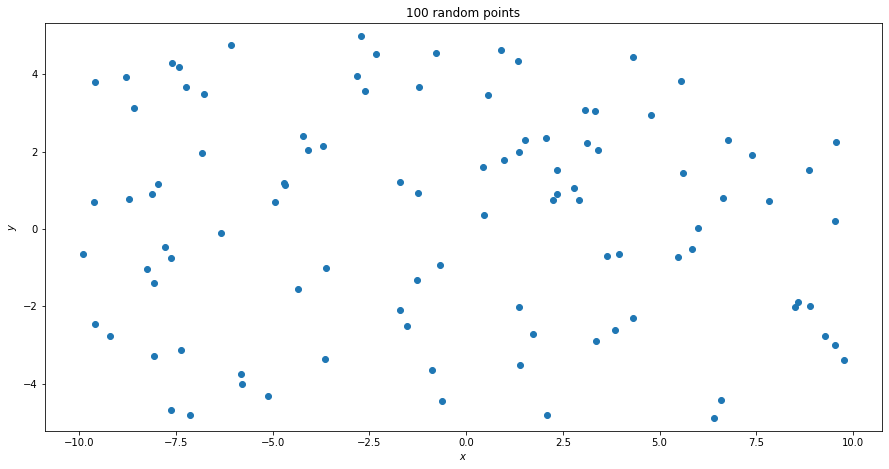

In [23]:
first_pic(points, limits, size=15, title='100 random points');

### 9.2. Найвіддаленіші точки

Функція:

In [24]:
def second_pic(points, limits, indices, size=7, title=''):
    fig = first_pic(points, limits, size, title)
    fig.axes[0].plot(points[indices].real, points[indices].imag, color='red')
    return fig

Використання:

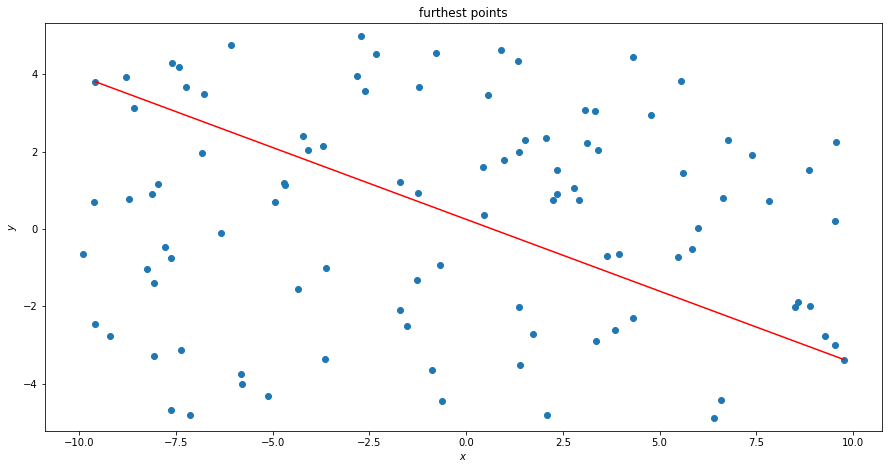

In [25]:
second_pic(points, limits, indices, size=15, title='furthest points');

### 9.3. Повернуті точки

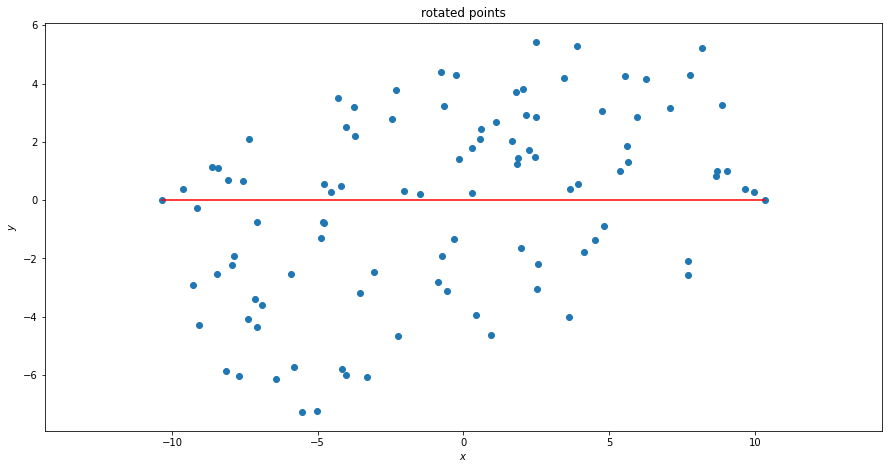

In [26]:
second_pic(rotated_points, limits, indices, size=15, title='rotated points');

### 9.4. Пошук перпендикулярів

Функція

In [27]:
def third_pic(rotated_points, indices, vertical_perpendiculars, size=7, title=''):
    limits = (np.max(rotated_points.real), np.min(rotated_points.real),
              np.max(rotated_points.imag), np.min(rotated_points.imag))
    fig = second_pic(rotated_points, limits, indices, size, title)
    ax = fig.axes[0]
    ax.plot(vertical_perpendiculars[0].real,
            vertical_perpendiculars[0].imag, color='red')
    ax.plot(vertical_perpendiculars[1].real, 
            vertical_perpendiculars[1].imag, color='red')
    return fig

Використання

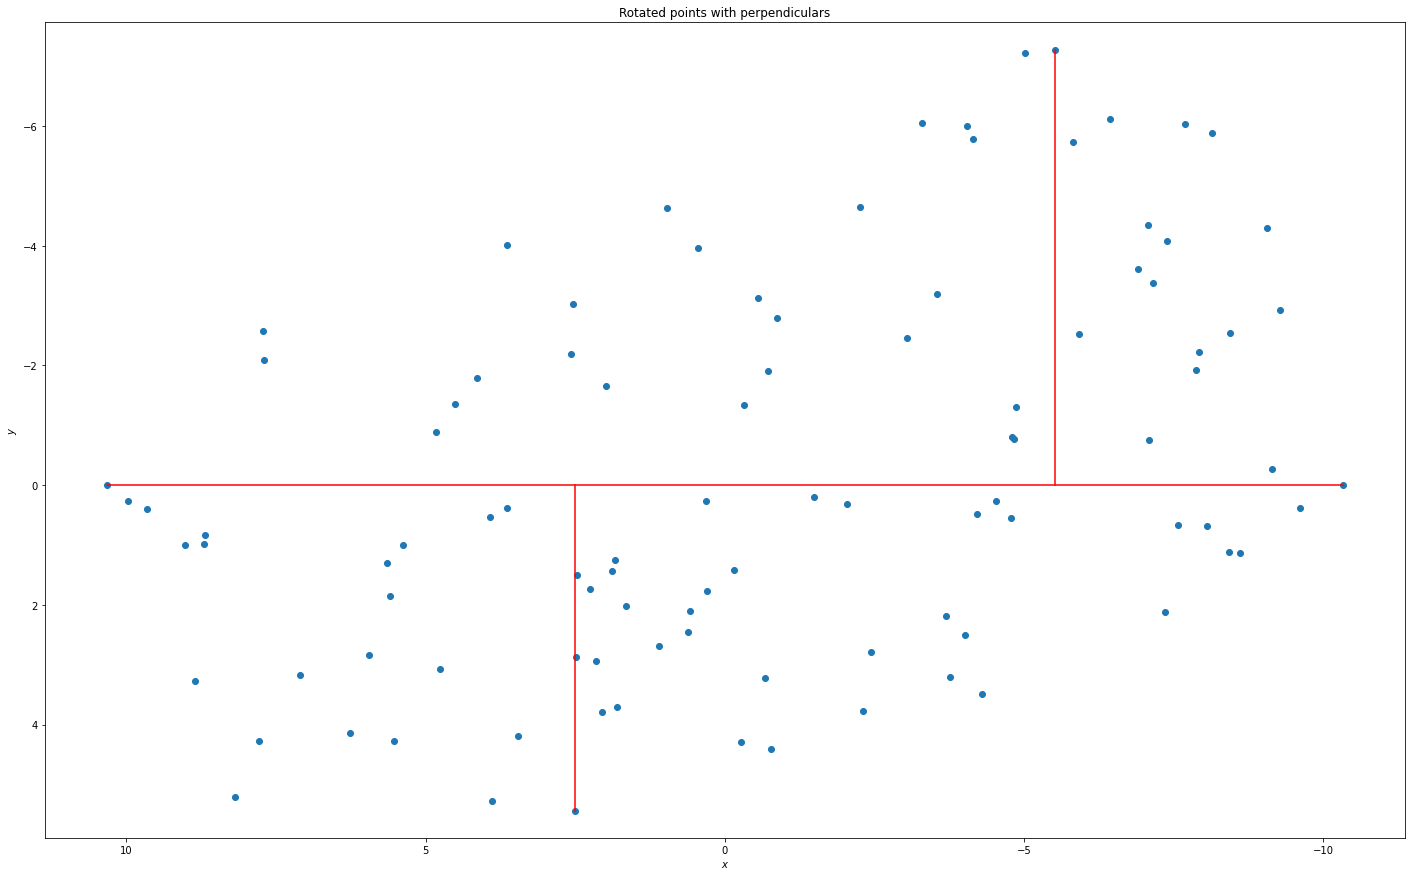

In [28]:
third_pic(rotated_points, indices, vertical_perpendiculars, size=15,
          title='Rotated points with perpendiculars');

### 9.5. Стиск точок

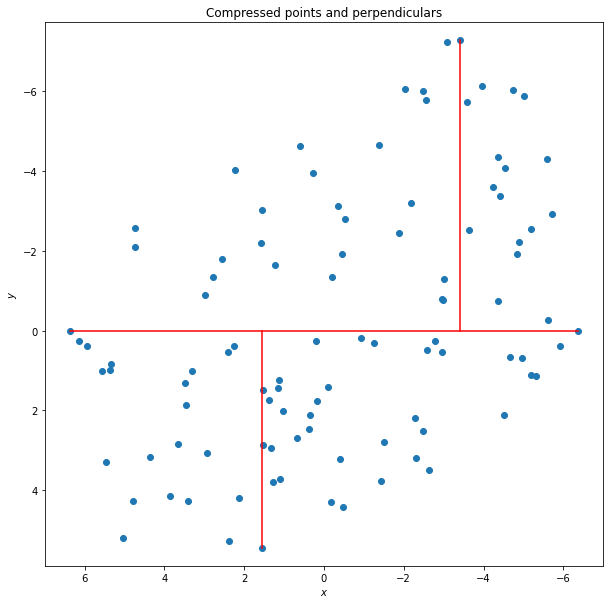

In [29]:
third_pic(compressed_points, indices, compressed_segments, size=10,
          title='Compressed points and perpendiculars');

<div class="alert alert-danger">
    <h1> TODO </h1>
<div>

## Проведем концентричексие окружности

Проведем концентрические окружности через каждую точку с центром в усредненной точке, которя строится из усреднения по горизонтале границ горизонтального отрезка, а по вертикале усредняются точки из которых провели перпендикуляры. Также будем сохранять кол-во точек, что попали внутрь концентричекой окружности(включая границу)

In [578]:
def find_centr(data,index_max, v_index):
    """
    Функция вычисляет центр концентрических окружностей.
    Центр это усреднение по index_max (ось x) и v_index (ось y)
    """
    return np.array([(data[0,index_max[0]]+data[0,index_max[1]])/2, (data[1,v_index[0]]+data[1,v_index[1]])/2 ])

In [579]:
class MyCircle:
    """
    класс круга, который хранит количество точек, что попали внутрь (включая границу). Для этого передается data
    """
    def __init__(self, xy, radius, data):
        self.xy = xy
        self.radius = radius
        self.count = self._count_of_inside_dots(data)
    def _count_of_inside_dots(self,data):
        """
        функция делает перефор точек data и возвращает кол-во попавших внутрь окружности (включая границу)
        """
        # транспонируем для удобства вычисления расстояния
        count =0
        for dot in data.T:
            if distance(dot, self.xy) <= self.radius:
                count+=1
        return count

    def __str__(self):
        return f"MyCircle xy: {self.xy}, radius: {self.radius},count: {self.count}"

### Создадим список концентрических окружностей

In [580]:
mycircle_list = []
new_centr = find_centr(s_rdata, index_max, v_index)
for dot in s_rdata.T:
    mycircle_list.append(MyCircle(new_centr, distance(dot, new_centr), s_rdata))


Выведем несколько окружностей для наглядности

In [581]:
print(*mycircle_list[:5], sep='\n')

MyCircle xy: [-1.83767626 -4.1301984 ], radius: 3.7925226383810737,count: 34
MyCircle xy: [-1.83767626 -4.1301984 ], radius: 6.753172571677432,count: 81
MyCircle xy: [-1.83767626 -4.1301984 ], radius: 6.735828800000406,count: 80
MyCircle xy: [-1.83767626 -4.1301984 ], radius: 5.332261979143282,count: 64
MyCircle xy: [-1.83767626 -4.1301984 ], radius: 7.289073292093623,count: 86


### Рисунок окружностей

Для создания рисунка используется библиотека *matplotlib* и класс *matplotlib.patches.Circle*

In [582]:
def fourth_pic(s_rdata, index_max,v_index, segments, centr, mycircle_list,size = 7, title= ""):
    """
    Рисунок для кваратной области с концентрическими окружностями
    """
    fig = third_pic(s_rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for circle in mycircle_list:
        ax.add_patch(ptc.Circle(circle.xy,circle.radius, fill= False, color ="green"))
    return fig

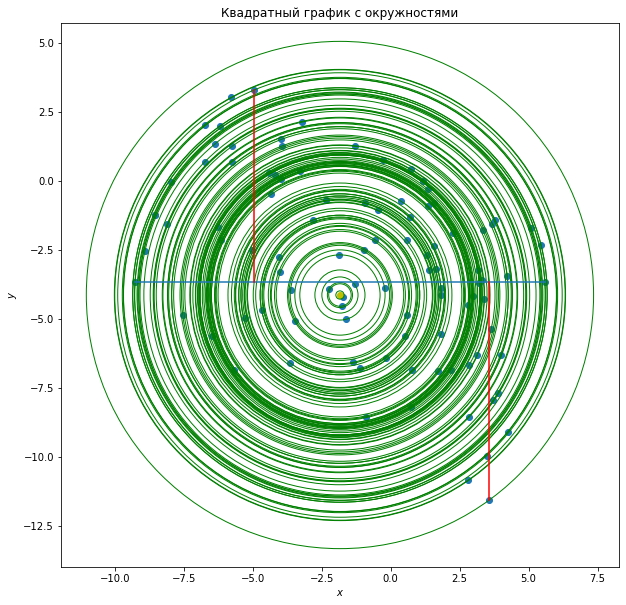

In [583]:
_= fourth_pic(s_rdata,index_max,v_index, s_segments, new_centr, mycircle_list, size = 10,
              title="Квадратный график с окружностями")

## Создание эллипса Петунина

Теперь вернем данные к виду из предыдущих шагов (обернем операцию сжатия). Получим просто повернутый набор данных. Также растянем концентричекие окружности( получим эллипсы):
- будет перенесен центр
- главной осью полученного эллипса будет диаметр окружности умноженный на коэф. растяжения
- угол полученного эллипса равен нулю (угол между осью *x* и главной осью эллипса).
- количество точек, что было внутри окружности, будет равно кол-ву точек, что попали внутрь эллипса.

In [584]:
class MyEllipse:
    """
    Класс эллипсов с кол-вом точек, что попали внутрь (включая границу)
    """
    def __init__(self, xy, width, height, angle=0, count=0):
        self.xy = xy
        self.width = width
        self.height = height
        self.angle = angle
        self.count = count
    def __str__(self):
        return f"MyEllipse xy: {self.xy}, width: {self.width}, height: {self.height}, angle: {self.angle}, count: {self.count}"

### Создадим список эллипсов

In [585]:
myellipse_list = []
inv_koef = 1/koef
r_centr = s_rdata.T[index_max[0]] + (new_centr - s_rdata.T[index_max[0]])*np.array([inv_koef,1])
for circle in mycircle_list:
    myellipse_list.append(MyEllipse(r_centr, 2*circle.radius*inv_koef, 2*circle.radius,
                                    angle=0, count=circle.count))

Для наглядности выведем несколько эллипсов.

In [586]:
print(*myellipse_list[:5], sep="\n")

MyEllipse xy: [ 0.28563719 -4.1301984 ], width: 9.752947707761724, height: 7.5850452767621475, angle: 0, count: 34
MyEllipse xy: [ 0.28563719 -4.1301984 ], width: 17.366630402284443, height: 13.506345143354864, angle: 0, count: 81
MyEllipse xy: [ 0.28563719 -4.1301984 ], width: 17.322028717772522, height: 13.471657600000812, angle: 0, count: 80
MyEllipse xy: [ 0.28563719 -4.1301984 ], width: 13.712580571139352, height: 10.664523958286564, angle: 0, count: 64
MyEllipse xy: [ 0.28563719 -4.1301984 ], width: 18.744766329510455, height: 14.578146584187246, angle: 0, count: 86


### Рисунок горизонтальных эллипсов

In [587]:
def fifth_pic(rdata, index_max, v_index, segments, centr, myellipse_list, size =7, title =""):
    """
    Рисует эллипсы на повернутом рисунке
    """
    fig = third_pic(rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig

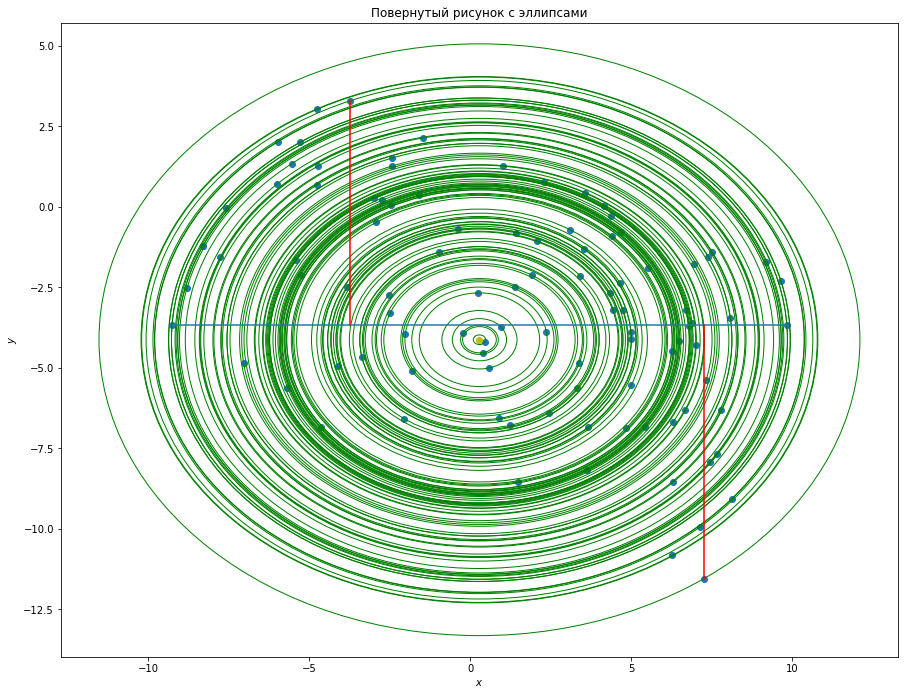

In [588]:
_= fifth_pic(rdata, index_max, v_index, segments, r_centr, myellipse_list, size =15, 
          title = "Повернутый рисунок с эллипсами")

### Эллипсы Петунина на изначальном наборе данных

Для этого изменим параметры эллипсов - поменяем угол на нужный.

In [589]:
centr = rotate_point(r_centr,data[:,index_max[0]], angle)
for ell in myellipse_list:
    ell.angle = np.degrees(angle)
    ell.xy = centr

Для наглядности выведем насколько эллипсов

In [590]:
print(*myellipse_list[:5], sep="\n")

MyEllipse xy: [[-0.22052067]
 [-0.57137602]], width: 9.752947707761724, height: 7.5850452767621475, angle: 21.665151804932602, count: 34
MyEllipse xy: [[-0.22052067]
 [-0.57137602]], width: 17.366630402284443, height: 13.506345143354864, angle: 21.665151804932602, count: 81
MyEllipse xy: [[-0.22052067]
 [-0.57137602]], width: 17.322028717772522, height: 13.471657600000812, angle: 21.665151804932602, count: 80
MyEllipse xy: [[-0.22052067]
 [-0.57137602]], width: 13.712580571139352, height: 10.664523958286564, angle: 21.665151804932602, count: 64
MyEllipse xy: [[-0.22052067]
 [-0.57137602]], width: 18.744766329510455, height: 14.578146584187246, angle: 21.665151804932602, count: 86


Изменим угол наклона перпендикуляров.

In [591]:
segments_r = []
for seg in segments:
    segments_r.append(rotate_point(seg,data[:,index_max[0]], angle))

### Рисунок со вспомогатеьлными отрезками

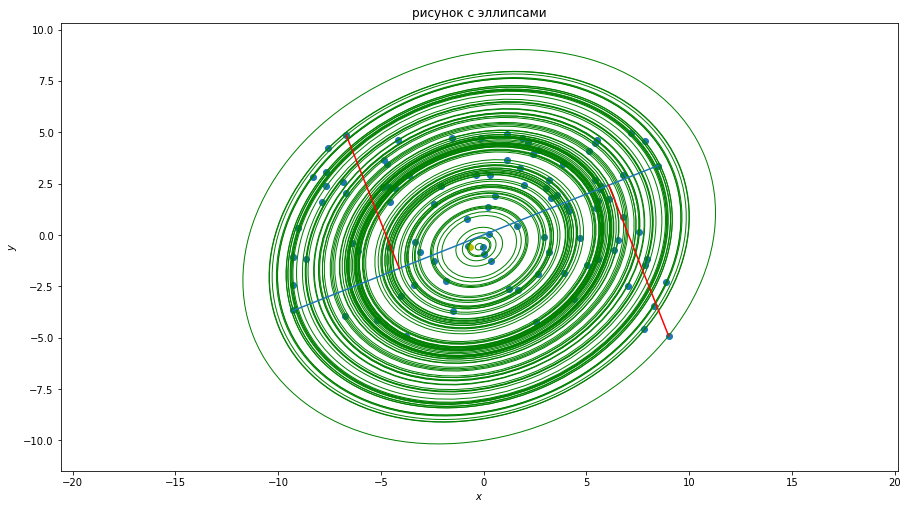

In [592]:
_= fifth_pic(data, index_max, v_index, segments_r, end_centr, myellipse_list, size = 15,
          title = "рисунок с эллипсами")

### Рисунок результата

In [593]:
def end_pic(data, myellipse_list, centr, size =7 ,title = ""):
    """
    Рисунок с эллипсами Петунина без вспомогательных отрезков
    """
    new_y_limits = rdata[1,v_index[0]]*1.1, rdata[1,v_index[1]]*1.1
    new_x_limits = rdata[0,index_max[0]]*1.1, rdata[0,index_max[1]]*1.1
    fig= first_pic(data, new_x_limits, new_y_limits, size , title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig

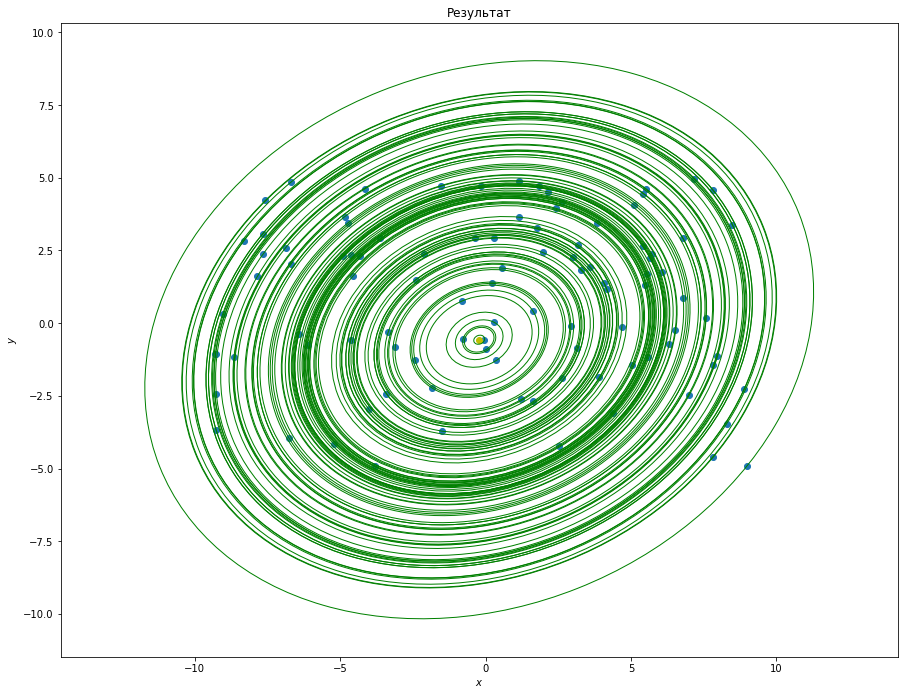

In [594]:
_= end_pic(data, myellipse_list, centr, size =15 ,title = "Результат")